# 图像处理实验3
陈乐昕 2020-11-04

## 图像处理环境
- numpy
- matplotlib.pyplot
- random
- math

## 使用K-means算法进行聚类

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *

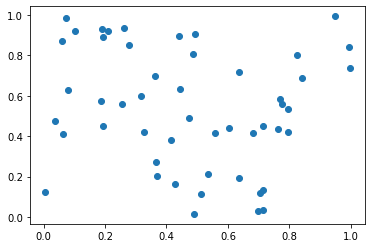

array([[0.49190891, 0.90380137],
       [0.193363  , 0.89327801],
       [0.79474885, 0.53529619],
       [0.42831068, 0.16395341],
       [0.6048333 , 0.43905619],
       [0.94954854, 0.99403894],
       [0.53451055, 0.21317003],
       [0.26124544, 0.93686195],
       [0.32630728, 0.41876449],
       [0.4739576 , 0.48920843],
       [0.06455878, 0.41186358],
       [0.69813759, 0.02881633],
       [0.7703075 , 0.58265565],
       [0.20873813, 0.92114667],
       [0.83989152, 0.69035883],
       [0.36923926, 0.20460929],
       [0.31631897, 0.59756313],
       [0.44264018, 0.63277442],
       [0.4408193 , 0.89686236],
       [0.00621296, 0.12400181],
       [0.36258035, 0.69681564],
       [0.48590317, 0.80840832],
       [0.79468285, 0.41854483],
       [0.77482511, 0.55726289],
       [0.70553242, 0.12029567],
       [0.07235956, 0.98487944],
       [0.55778405, 0.41610195],
       [0.27897356, 0.85380533],
       [0.19333836, 0.45291342],
       [0.48854061, 0.01531959],
       [0.

In [3]:
# 1. 数据集
X = np.random.random((50,2))*100
plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
# 2. 确定聚类个数
# 聚类中心个数
k = 3

In [10]:
# 3. 占位符数组
# 数据集数据个数
data_length = len(X)
# 聚类中心 二维数组[3,2]
cluster_center = np.zeros([3,2], dtype = float, order = 'C')
# array([[0., 0.],
#        [0., 0.],
#        [0., 0.]])
# 距离数组 一维数组[1,3] 
distance = np.zeros([3], dtype = float, order = 'C')
# array([0., 0., 0.])
# 聚类数组 一维数组[1,50]
label = np.zeros([data_length],dtype=int,order='C')
# 标签
tag = 0
# 颜色
colors = ['r', 'b', 'g']

In [11]:
# 4. 初始化聚类中心
# 生成k个不同随机数
rand_data = random.sample(range(0,data_length), k)
# [19, 40, 39]
# 得出k个聚类中心
for i in range(k):
    # 随机选出
    cluster_center[i] = X[rand_data[i]]
    # 不随机选出
    # cluster_center[i] = X[i]
(rand_data, cluster_center)

([27, 25, 30],
 array([[33.61509557, 75.23868376],
        [54.72956472, 15.07441721],
        [99.20930808, 48.75515593]]))

label= [1 1 1 0 0 2 1 1 1 2 0 0 0 1 0 1 2 0 2 0 2 2 1 1 2 1 1 0 1 2 2 2 0 0 2 1 1
 0 0 0 0 2 1 1 0 1 1 1 1 1]
cluster_center= [[33.53695217 72.35193323]
 [43.94911456 22.23494124]
 [83.43990478 50.30396623]]


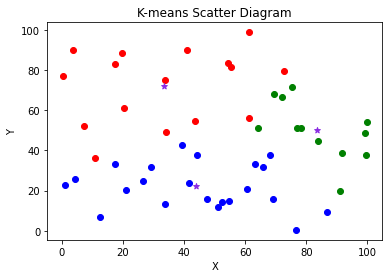

label= [1 2 1 1 0 2 1 1 1 2 0 0 0 1 0 1 2 2 2 0 2 2 1 1 2 1 1 0 1 2 2 2 0 0 2 1 1
 2 0 0 0 2 1 2 0 1 1 1 1 1]
cluster_center= [[30.14006574 75.83433839]
 [39.18501142 22.79288048]
 [80.62778238 49.12189654]]


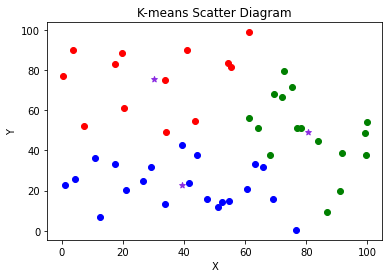

label= [1 2 1 1 0 2 1 1 1 2 0 0 0 1 0 1 2 2 2 0 2 2 1 2 2 1 1 0 1 2 2 2 0 0 2 1 2
 2 0 0 0 2 1 2 0 1 1 1 1 1]
cluster_center= [[30.14006574 75.83433839]
 [36.51020193 21.77779704]
 [78.84644006 47.26792727]]


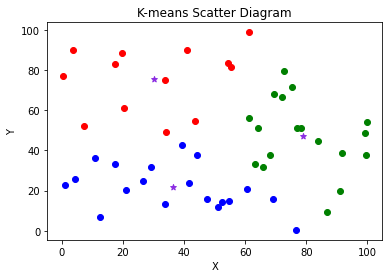

label= [1 2 1 1 0 2 1 1 1 2 0 0 0 1 0 1 2 2 2 0 2 2 1 2 2 1 2 0 1 2 2 2 0 0 2 1 2
 2 0 0 0 2 1 2 0 1 1 1 1 1]
cluster_center= [[30.14006574 75.83433839]
 [34.7060073  22.10269693]
 [78.32745402 45.61854157]]


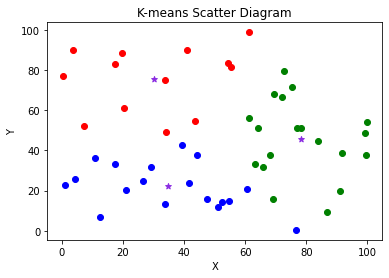

label= [1 2 2 1 0 2 1 1 1 2 0 0 0 1 0 1 2 2 2 0 2 2 1 2 2 1 2 0 1 2 2 2 0 0 2 1 2
 2 0 0 0 2 1 2 0 1 1 1 1 1]
cluster_center= [[30.14006574 75.83433839]
 [32.24559326 23.37778068]
 [78.23773361 43.35892815]]


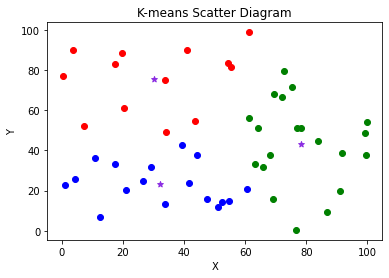

In [12]:
# 7. 重复5、6
# 批次
# 一开始为20次，发现在随机聚类中心的情况下，最少3次就可以收敛
# 在不随机聚类中心的情况下，同样也是最少3次就可以收敛，收敛很快，可以发现是否收敛速度与聚类中心是否随机并没有关系
# 聚类中心只会影响聚类的分类
epoches = 5
for epoch in range(epoches):
    # 5. 计算E：数据到每一个聚类中心的欧式距离
    for n in range(data_length):
        for i in range(k):
            distance[i] = sqrt((X[n,0] - cluster_center[i,0])**2 + (X[n,1] - cluster_center[i,1])**2)
        # print(distance)
        # 数据归入最小E的聚类中心中 np.argmin(distance)会返回最小值的索引
        # print(np.min(distance))
        tag = np.argmin(distance)
        # print(tag)
        label[n] = tag
    print("label=", label)

    # 6. 计算M：根据每一个聚类的数据集，重新计算聚类中心
    for i in range(k):
        cluster_center_x_sum = 0.0
        cluster_center_y_sum = 0.0
        count = 0.0
        for n in range(data_length):
            if label[n]==i:
                cluster_center_x_sum = cluster_center_x_sum + X[n,0]
                cluster_center_y_sum = cluster_center_y_sum + X[n,1]
                count = count + 1
        cluster_center[i] = [cluster_center_x_sum/count, cluster_center_y_sum/count]
    print("cluster_center=", cluster_center)

    # 8. 聚类结果表示
    for i in range(k):
        for n in range(data_length):
            if label[n]==i:
                plt.scatter(X[n,0],X[n,1],c=colors[i],marker='o')
        plt.scatter(cluster_center[i,0],cluster_center[i,1],c='#8A2BE2',marker='*')
    # 设置标题
    plt.title('K-means Scatter Diagram')
    # 设置X轴标签
    plt.xlabel('X')
    # 设置Y轴标签
    plt.ylabel('Y')
    plt.show()

## 反思
1. np的用法：
    - 如何构造随机数组
    - 构造占位符数组
    - 构造的数组的使用
2. 随机数的生成：
    - 用不同方式产生随机数
3. math库的使用
4. matplotlib库的使用：
    - 如何画出数据点图
    - 图参数的使用

## 总结
1. 一开始循环批次为20次，发现在随机聚类中心的情况下，最少3次就可以收敛
2. 在不随机聚类中心的情况下，同样也是最少3次就可以收敛，收敛很快，可以发现是否收敛速度与聚类中心是否随机并没有关系
3. 聚类中心只会影响聚类的分类的位置与分布